# 1. Import Data into Pandas DataFrames

In [9]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [11]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [14]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


# 2. Exploring Data

### Inspecting City Data DataFrame

In [15]:
# 1. Get the count of non-missing values for each variable
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [17]:
# Get the count of missing values for each variable
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [18]:
# 2. Get the data types of each column in the DataFrame
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [22]:
# Check the unique types of city
city_type = set(city_data_df["type"])
city_type

# or
# city_data_df["type"].unique()

{'Rural', 'Suburban', 'Urban'}

In [29]:
# 3. Get the number of data points for each city type
city_data_df.groupby(["type"]).count()["city"]

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

### Inspecting Ride Data DataFrame

In [30]:
# 1. Get the count of non-missing values for each variable
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [31]:
# Get the count of missing values for each variable
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [33]:
# 2. Get the data types of each column in the DataFrame
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [ ]:
# 3. Get the number of data points for each city type
city_ride_df.groupby(["type"]).count()["city"]

### Checking Unique ID Values in Both DataFrames
Before merging, it is important to make sure that the common variables on which the merge is to be done contains the same name for the same observation. That is, we need to make sure that the name of the cities are the same in both datasets, that there are no misspellings or different spelling for the same city.

In [37]:
# Inspect the unique values for the city

city_data_unique_id = set(city_data_df["city"])
ride_data_unique_id = set(ride_data_df["city"])

In [38]:
city_data_unique_id - ride_data_unique_id

set()

In [39]:
ride_data_unique_id - city_data_unique_id

set()

# 3. Merging DataFrames
After making sure that the data in both datasets is clean and the unique merge id variables match, we can proceed with the merge. 

In [43]:
# Merge the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on = ["city", "city"])
pyber_data_df.head()
# By merging from the left, we are making sure that all cities from the ride share data would stay 
# in the combined dataset, even those cities that do not exist in the city data (hypothetically speaking).

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# 4. Creating a Bubble Chart - Average Fare vs. Total Number of Rides

### Creating DataFrames for Each City Type

In [48]:
# Create DataFrames for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Get the Count of Rides Per City for Each City Type

In [176]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

### Get the Average Fare Per City for Each City Type

In [177]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

### Get the Average Number of Drivers Per City for Each City Type

In [183]:
# In the city_data, there were 121 cities and when merged to the ride_data, it duplicated itself to 2375 observations
# since the ride_data does contain unique values for the city column, i.e.,
# there can be more than one ride recorded for the same city at different dates and different fares. 

# when taking the average of the driver count by city we are coming back to the city data. 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

### Creating a Bubble Chart for Each City Type

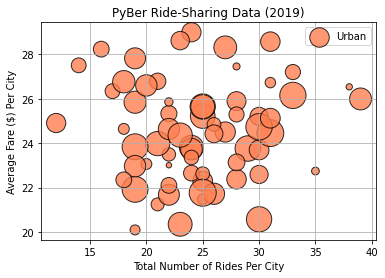

In [93]:
# Build the scatter plot for ubran cities
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=10*urban_driver_count, 
           color="coral", edgecolors="black", 
           alpha=0.8, linewidths=1, label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.legend()
plt.grid()

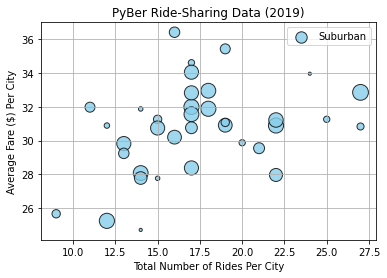

In [94]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
           s=10*suburban_driver_count, 
           color="skyblue", edgecolors="black", 
           linewidths=1, alpha=0.8, label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.legend()
plt.grid()

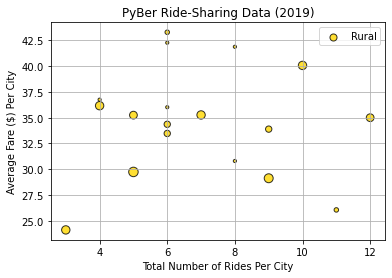

In [95]:
# Build the scatter plot for suburban cities
plt.scatter(rural_ride_count, rural_avg_fare, 
           s=10*rural_driver_count, 
           color="gold", edgecolors="black", 
           linewidths=1, alpha=0.8, label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.legend()
plt.grid()

### Creating a Bubble Chart for All Cities

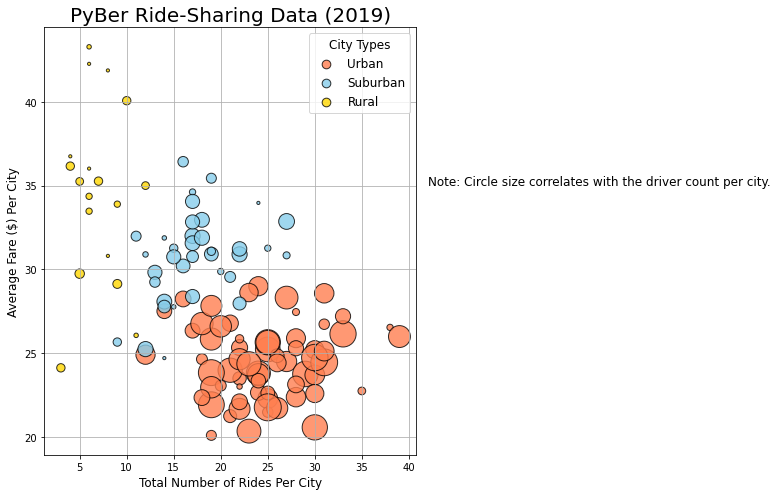

In [138]:
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=10*urban_driver_count, 
           color="coral", edgecolors="black", 
           alpha=0.8, linewidths=1, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
           s=10*suburban_driver_count, 
           color="skyblue", edgecolors="black", 
           linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
           s=10*rural_driver_count, 
           color="gold", edgecolors="black", 
           linewidths=1, alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel("Total Number of Rides Per City", fontsize = 12)
plt.ylabel("Average Fare ($) Per City", fontsize = 12)



lgnd = plt.legend(fontsize="12", 
                mode="Expanded",
                scatterpoints=1,
                 loc="best", 
                 title="City Types")

lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]

lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with the driver count per city.", fontsize="12", wrap=True)
plt.grid()
plt.rcParams["figure.figsize"] = (15, 8)

plt.savefig("Analysis/BubbleChart_Avg Fare vs Tot Number of Rides.png", dpi=300)
plt.tight_layout()

# Summary Statistics

Calculate the mean, median, and mode for:
   - The total number of rides for each city type
   - The average fares for each city type
   - The total number of drivers for each city type

### Overall Summary Statistics by Each City Type

In [141]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [142]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [143]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### Summary Statistics of the Ride Count (Per City) for Each City Type

In [ ]:
# Pandas describe() Function

In [144]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [145]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [146]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [ ]:
# Pandas mean(), median(), mode() functions 

In [154]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [157]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [158]:
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [159]:
# NumPy mean() and median()
# SciPy mode() 
import numpy as np
import scipy.stats as sts

In [215]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
# returns the number of times the mode appears in the dataset
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.") 

print(f'-------------------------------------------------------------------------------')
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.") 

print(f'-------------------------------------------------------------------------------')

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.") 

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
-------------------------------------------------------------------------------
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).
-------------------------------------------------------------------------------
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


### Summary Statistics for the Price Fare (Per City) by City Type

In [173]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Get the fares for the rural cities
rural_fares = rural_cities_df["fare"]

In [175]:
# Mean, median, mode
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

print(f'-------------------------------------------------------------------------------')

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

print(f'-------------------------------------------------------------------------------')

mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
-------------------------------------------------------------------------------
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
-------------------------------------------------------------------------------
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Summary Statistics for the Number of Drivers by City Type

In [184]:
# Get the driver count for each city type
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [214]:
# Mean, median, mode
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean driver count for urban trips is {mean_urban_drivers:.0f}.')
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver countfor urban trips is {mode_urban_drivers}.")

print(f'-------------------------------------------------------------------------------')

mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean driver count for suburban trips is {mean_suburban_drivers:.0f}.')
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

print(f'-------------------------------------------------------------------------------')

mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean driver count for rural trips is {mean_rural_drivers:.0f}.')
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.0f}.")
mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for urban trips is 37.
The median driver count for urban trips is 37.
The mode driver countfor urban trips is ModeResult(mode=array([39]), count=array([86])).
-------------------------------------------------------------------------------
The mean driver count for suburban trips is 14.
The median driver count for suburban trips is 16.
The mode driver count for suburban trips is ModeResult(mode=array([20]), count=array([79])).
-------------------------------------------------------------------------------
The mean driver count for rural trips is 4.
The median driver count for rural trips is 4.
The mode driver count for rural trips is ModeResult(mode=array([1]), count=array([32])).


# 6. Create Box-and-Whisker Plots to Check for Outliers

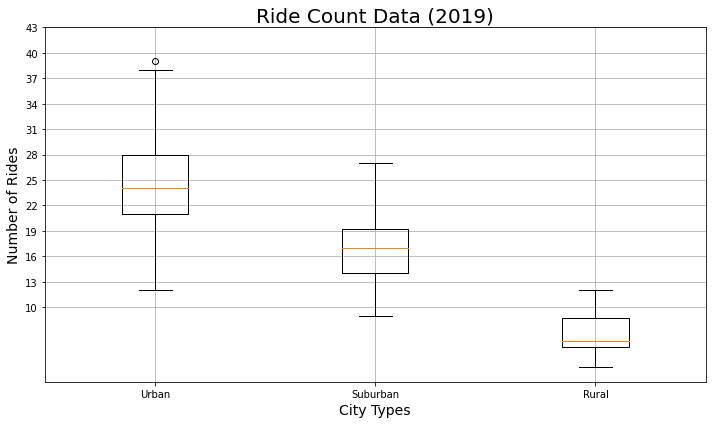

In [218]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(10, 45, step=3.0))
ax.grid()



fig.savefig("Analysis/Box_and_whisker plot.png", dpi=300)
fig.tight_layout()

Please note that **the method for code in the below cell** was taken from:
https://stackoverflow.com/questions/18861075/overlaying-the-numeric-value-of-median-variance-in-boxplots

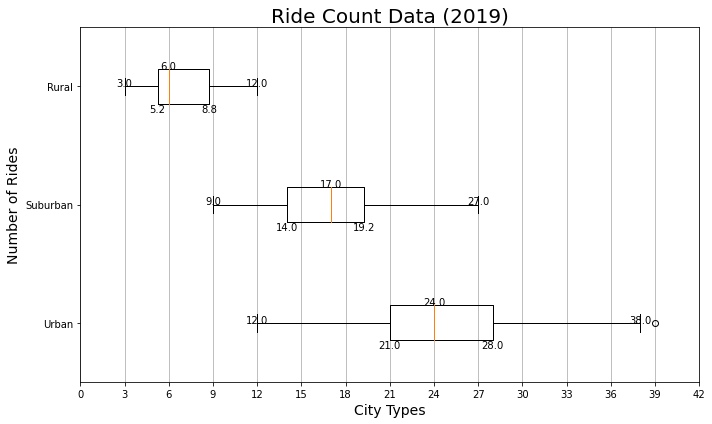

In [223]:
from pylab import *

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
    
y_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10,6))
bp = boxplot(ride_count_data, vert=False, labels=y_labels)

for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,
         horizontalalignment='center') # draw above, centered
    
for line in bp['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top')      # below
    
for line in bp['whiskers']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,
         horizontalalignment='center') # draw above, centered
    

# Add the title, y-axis label and grid.
plt.title("Ride Count Data (2019)", fontsize=20)
plt.ylabel("Number of Rides", fontsize=14)
plt.xlabel("City Types", fontsize=14)
plt.xticks(np.arange(0, 45, step=3.0))
plt.grid(axis="x")

plt.rcParams["figure.figsize"] = (10, 6)

plt.savefig("Analysis/Box_and_whisker plot.png", dpi=300)
plt.tight_layout()

# Create a pie chart visualizing each of the following data for each city type:
    - The percent of total fares. 
    - The percent of total rides. 
    - The percent of total drivers.  

### Get the Percentage of Fares for Each City Type

In [224]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [226]:
# Get the sum of all the fares for all city types
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [227]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

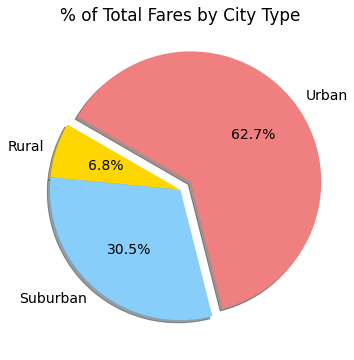

In [243]:
# Build the percentage of fares by city type pie chart.
# Build the percentage of fares by city type pie chart.

import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

# Save Figure

plt.savefig("Analysis/% Total Fares, Pie Chart.png", dpi=300)

### Get the Percentage of Rides for Each City Type

In [244]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

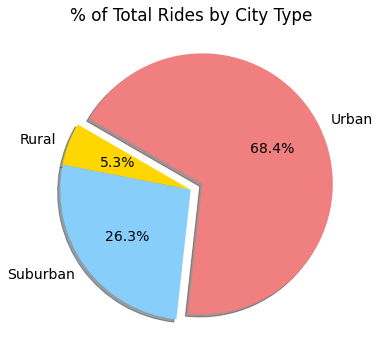

In [245]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/% Total Rides, Pie Chart.png")

### Get the Percentage of Drivers for Each City Type

In [246]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

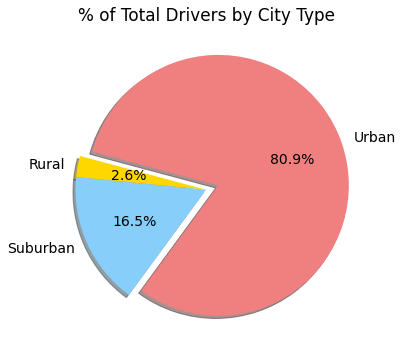

In [247]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/% Total Drivers, Pie Chart.png")